In [112]:
import os
import ssl
import sklearn
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import spacy
import re
import gensim
from gensim.models.keyedvectors import KeyedVectors
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
import textblob
from textblob import TextBlob, Word
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [84]:
data = pd.read_csv('/home/nausheen/SMAI2/Datasets/Question-4/weather.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279,9.9820,1017.22,Partly cloudy throughout the day.


# drop cols

In [85]:
data.drop(['Formatted Date'],axis=1,inplace = True)
data.drop(['Summary'],axis=1,inplace = True)
data.drop(['Precip Type'],axis=1,inplace = True)
data.drop(['Daily Summary'],axis=1,inplace = True)

# Randomly split data

In [86]:
print(data)
train_set=data.sample(frac=0.8,random_state=200) #random state is a seed value
test_set=data.drop(train_set.index)

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
5             9.222222                  7.111111      0.85            13.9587   
6             7.733333                  5.522222      0.95            12.3648   
7             8.772222                  6.527778      0.89            14.1519   
8            10.822222                 10.822222      0.82            11.3183   
9            13.772222                 13.772222      0.72            12.5258   
10           17.144444                 17.144444      0.54            19.7869   
11           17.800000      

# set train target value and test target value

In [87]:
target_train = train_set['Apparent Temperature (C)']
target_test = test_set['Apparent Temperature (C)']
print(target_train)
print(target_test)

25908     5.761111
54729    10.027778
32219    -5.094444
73746    21.277778
24550    14.911111
37292    -6.094444
27630    22.222222
19063    16.733333
25014     7.600000
18204     7.688889
57469     1.777778
10722    28.183333
55099    11.527778
21268    11.666667
44719    -8.216667
61237    11.583333
71953    -1.483333
58282     7.622222
24111    21.666667
57575     4.161111
3818     26.250000
59728    26.883333
22677     6.111111
75378    19.883333
25935    25.000000
77199    16.205556
41352     4.466667
26091    17.222222
58313     6.161111
47062    10.555556
           ...    
54445    21.050000
62785    14.744444
16624     4.955556
52407    17.300000
57393    -2.494444
62638    21.900000
30007     3.816667
14572     7.716667
6440     10.972222
55842    13.794444
6972     16.666667
17282    14.888889
35566    12.211111
65061    -1.783333
9711     -8.811111
74243    27.094444
4298      3.155556
46152    28.472222
5909     20.000000
57696     8.933333
27594    22.222222
27055     5.

# Drop output col

In [88]:
train_set.drop(['Apparent Temperature (C)'],axis=1,inplace = True)
test_set.drop(['Apparent Temperature (C)'],axis=1,inplace = True)
print(train_set)
print(test_set)

       Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
25908         7.777778      0.58            11.2700                     350   
54729        10.027778      0.83            31.7653                     219   
32219        -0.016667      0.87            18.9980                     277   
73746        21.277778      0.69            13.2825                     324   
24550        14.911111      0.82             5.5545                       0   
37292        -3.305556      0.89             6.6815                     208   
27630        22.222222      0.59            24.1500                     140   
19063        16.733333      0.73            11.4310                     289   
25014         8.627778      0.70             7.1806                     298   
18204         7.688889      0.93             3.0268                     182   
57469         4.472222      0.83            11.2700                     163   
10722        28.888889      0.36             9.3541 

In [89]:
x = train_set.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train = pd.DataFrame(x_scaled)

y=test_set.values
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
test = pd.DataFrame(y_scaled)

In [90]:
train.insert(6,"additional",1)
test.insert(6,"additional",1)

In [91]:
print(train)
print(test)

              0     1         2         3      4         5  additional
0      0.479525  0.58  0.176500  0.974930  1.000  0.970680           1
1      0.515975  0.83  0.497479  0.610028  0.615  0.957826           1
2      0.353254  0.87  0.297529  0.771588  0.285  0.967870           1
3      0.698227  0.69  0.208018  0.902507  0.951  0.970393           1
4      0.595086  0.82  0.086989  0.000000  0.941  0.969638           1
5      0.299973  0.89  0.104639  0.579387  0.437  0.984853           1
6      0.713527  0.59  0.378215  0.389972  0.620  0.967717           1
7      0.624606  0.73  0.179022  0.805014  0.708  0.966953           1
8      0.493295  0.70  0.112456  0.830084  0.941  0.966637           1
9      0.478085  0.93  0.047403  0.506964  0.310  0.960722           1
10     0.425974  0.83  0.176500  0.454039  0.474  0.976261           1
11     0.821528  0.36  0.146495  0.693593  0.696  0.967096           1
12     0.540275  0.90  0.267776  0.356546  0.479  0.969504           1
13    

In [92]:
X = train.values
Y = test.values
old_theta = [1,1,1,0,0,0,1]

In [93]:
alpha = 0.1
theta=[]
m=len(target_train)
list_of_cost=[]
print(m)
iterations = 50000
while(iterations > 0):
    iterations = iterations -1
    E = (np.dot(X,old_theta)-target_train)
#     print(X.shape)
    dz = (1/m)*(np.dot(X,old_theta)-target_train)
    dj = np.dot(dz,X)
    cost = (1/(2*m))*np.sum(np.square(np.dot(X,old_theta)-target_train))
    if(iterations==100 or iterations==1000 or iterations==10000 or iterations == 20000):
        list_of_cost.append(cost)
    theta = old_theta - alpha*(dj)
    old_theta = theta
Y = test.values
m1 = len(target_test)
print("cost ",list_of_cost)
predict_label = np.dot(theta,Y.T)
R2_score = r2_score(target_test, predict_label)
mean_abs_err = mean_absolute_error(target_test, predict_label)
print("R2 score",R2_score)
print("mean absolute error ",mean_abs_err)
list_of_cost

61828
cost  [0.5786790194487048, 0.5786790194483521, 0.578679019448352]
R2 score 0.9864859115879191
mean absolute error  0.8828168817861053


[0.5786790194487048, 0.5786790194483521, 0.578679019448352]

In [111]:
def percentage_error(target_test, predict_label):
    res = np.empty(target_test.shape)
    for j in range(target_test.shape[0]):
        if target_test[j] != 0:
            res[j] = (target_test[j] - predict_label[j]) / target_test[j]
        else:
            res[j] = predict_label[j] / np.mean(target_test)
    return res

def mean_absolute_percentage_error(target_test, predict_label): 
    m= np.mean(np.abs(percentage_error(np.asarray(target_test), np.asarray(predict_label)))) * 100
    return m

MAPE = mean_absolute_percentage_error(target_test, predict_label)
print("MAPE ",MAPE)

MAPE  38.20483579241943


In [115]:
MSE = mean_squared_error(target_test, predict_label)
print("MSE ",MSE)

MSE  1.5569022380557915


In [120]:
def find_li(theta1):
    alpha = 0.1
    theta=[]
    old_theta = theta1
    m=len(target_train)
    list_of_cost=[]
    print(m)
    iterations = 50000
    while(iterations > 0):
        iterations = iterations -1
        E = (np.dot(X,old_theta)-target_train)
    #     print(X.shape)
        dz = (1/m)*(np.dot(X,old_theta)-target_train)
        dj = np.dot(dz,X)
        cost = (1/(2*m))*np.sum(np.square(np.dot(X,old_theta)-target_train))
        if(iterations==100 or iterations==1000 or iterations==10000 or iterations == 20000):
            list_of_cost.append(cost)
        theta = old_theta - alpha*(dj)
        old_theta = theta
    Y = test.values
    m1 = len(target_test)
    print("cost ",list_of_cost)
    predict_label = np.dot(theta,Y.T)
    R2_score = r2_score(target_test, predict_label)
    mean_abs_err = mean_absolute_error(target_test, predict_label)
    print("R2 score",R2_score)
    print("mean absolute error ",mean_abs_err)
    print(list_of_cost)
    return list_of_cost

61828
cost  [0.578679020084467, 0.5786790194487048, 0.5786790194483521, 0.578679019448352]
R2 score 0.9864859115879191
mean absolute error  0.8828168817861053
[0.578679020084467, 0.5786790194487048, 0.5786790194483521, 0.578679019448352]
61828
cost  [0.5786790201115318, 0.5786790194487199, 0.5786790194483522, 0.578679019448352]
R2 score 0.9864859115876818
mean absolute error  0.8828168817812545
[0.5786790201115318, 0.5786790194487199, 0.5786790194483522, 0.578679019448352]


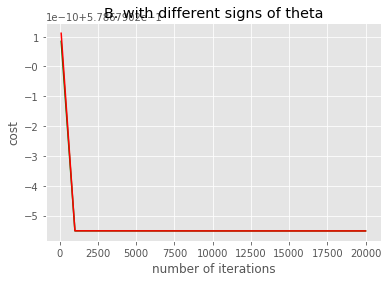

In [121]:
import matplotlib.pyplot as plt 
itr = [100,1000,10000,20000] 
cost1 = find_li([1,1,1,0,0,0,1])
plt.plot(itr, cost1,color='green') 
itr = [100,1000,10000,20000] 
cost2 = find_li([-1,-1,-1,-2,-2,-2,-1])
plt.plot(itr, cost2,color='red')  
plt.xlabel('number of iterations') 
plt.ylabel('cost')  
plt.title('B. with different signs of theta')  
plt.show() 

In [122]:
print(cost1)

[0.578679020084467, 0.5786790194487048, 0.5786790194483521, 0.578679019448352]
